# Neural Networks: Iris and Wine Dataset Analysis
This notebook explores modifying and training a neural network on the Iris dataset, then applies a similar approach to the Wine dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Part 1: Modifying the Neural Network (Iris Dataset)

In [2]:
# Load and preprocess the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [3]:
# Build the modified neural network
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Added layer
    Dense(8, activation='relu', name="Hidden_Layer_3"),
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
modified_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_modified = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate the model
test_loss_mod, test_accuracy_mod = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model Test Loss: {test_loss_mod:.4f}, Test Accuracy: {test_accuracy_mod:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4061 - loss: 1.1411 - val_accuracy: 0.3810 - val_loss: 1.1252
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5139 - loss: 1.0845 - val_accuracy: 0.5238 - val_loss: 1.0888
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6035 - loss: 1.0470 - val_accuracy: 0.5238 - val_loss: 1.0554
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6169 - loss: 1.0095 - val_accuracy: 0.5238 - val_loss: 1.0226
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6114 - loss: 0.9706 - val_accuracy: 0.5238 - val_loss: 0.9892
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6268 - loss: 0.9310 - val_accuracy: 0.5714 - val_loss: 0.9547
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6986 - loss: 0.8906 - val_accuracy: 0.6667 - val_loss: 0.9190
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7707 - loss: 0.8487 - val_accuracy: 0.6667 - val_loss

## Part 2: Applying the Model to the Wine Dataset

In [4]:
# Load and preprocess the Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the features and one-hot encode the labels
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)
encoder_wine = LabelBinarizer()
y_wine_encoded = encoder_wine.fit_transform(y_wine)

# Split the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.3, random_state=42)

In [5]:
# Build the neural network for the Wine dataset
wine_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_wine.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train_wine.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
wine_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_wine = wine_model.fit(X_train_wine, y_train_wine, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate the model
test_loss_wine, test_accuracy_wine = wine_model.evaluate(X_test_wine, y_test_wine, verbose=0)
print(f"Wine Model Test Loss: {test_loss_wine:.4f}, Test Accuracy: {test_accuracy_wine:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3843 - loss: 1.0479 - val_accuracy: 0.4400 - val_loss: 1.0353
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4939 - loss: 0.9259 - val_accuracy: 0.6000 - val_loss: 0.9422
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7492 - loss: 0.8310 - val_accuracy: 0.6000 - val_loss: 0.8623
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7774 - loss: 0.7476 - val_accuracy: 0.6400 - val_loss: 0.7898
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7947 - loss: 0.6712 - val_accuracy: 0.7600 - val_loss: 0.7230
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8239 - loss: 0.6036 - val_accuracy: 0.8000 - val_loss: 0.6635
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8554 - loss: 0.5442 - val_accuracy: 0.8000 - val_loss: 0.6106
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8594 - loss: 0.4915 - val_accuracy: 0.8000 - val_loss: 0.5621
E

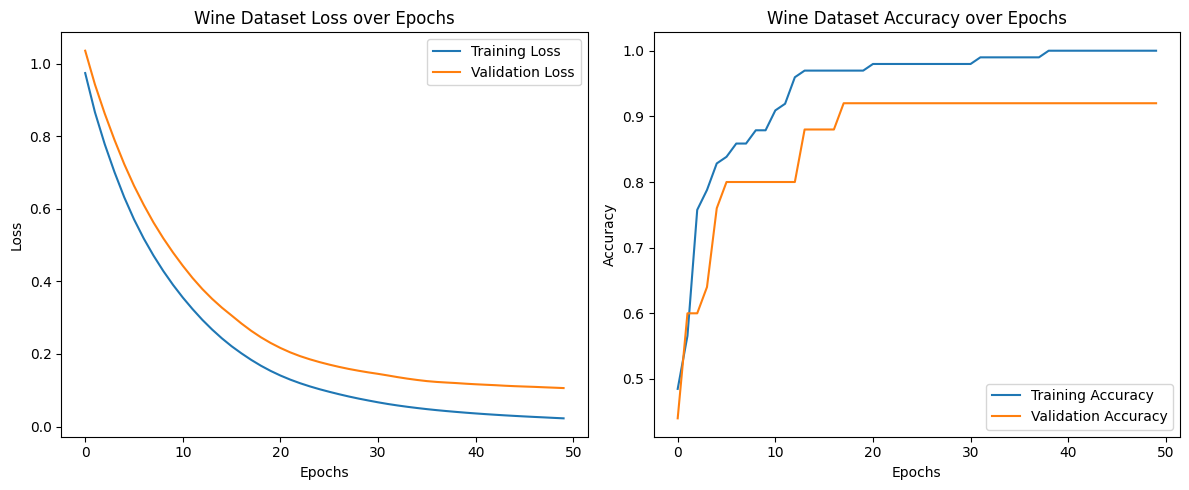

In [6]:
# Visualize training history for the Wine dataset
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_wine.history['loss'], label='Training Loss')
plt.plot(history_wine.history['val_loss'], label='Validation Loss')
plt.title('Wine Dataset Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_wine.history['accuracy'], label='Training Accuracy')
plt.plot(history_wine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Wine Dataset Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()